South African Language Identification Hack 2023: EA language classification hackathon : Seshwene Makhura 

South Africa is a multicultural society that is characterised by its rich linguistic diversity. Language is an indispensable tool that can be used to deepen democracy and also contribute to the social, cultural, intellectual, economic and political life of the South African society.

The country is multilingual with 11 official languages, each of which is guaranteed equal status. Most South Africans are multilingual and able to speak at least two or more of the official languages.

South Africa is a multicultural society that is characterised by its rich linguistic diversity. Language is an indispensable tool that can be used to deepen democracy and also contribute to the social, cultural, intellectual, economic and political life of the South African society.

The country is multilingual with 11 official languages, each of which is guaranteed equal status. Most South Africans are multilingual and able to speak at least two or more of the official languages.

With such a multilingual population, it is only obvious that our systems and devices also communicate in multi-languages.

In this challenge, you will take text which is in any of South Africa's 11 Official languages and identify which language the text is in. This is an example of NLP's Language Identification, the task of determining the natural language that a piece of text is written in.

In [68]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
# load the data
df = pd.read_csv('train_set.csv')

# Exploring the training dataset

In [70]:
df.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [71]:
df.sample(5)

,lang_id,text
7666,tso,munhu loyi a komberiwaku ku nyiketa nothisi u ...
16483,afr,die doel van hierdie projek is om ontwikkelend...
24785,zul,ukuphakamisa isiqubulo iphalamende elinakekela...
32174,ssw,a mengameli atawukhipha nobe nguliphi lilunga ...
5862,afr,of sy bevind het dat die tendens betreffende d...


In [72]:
# Shape of the dataset
df.shape

(33000, 2)

Training dataset comprises of 33000 rows with 2 columns

In [73]:
df.info()         # dtype object meaning Categorical dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lang_id  33000 non-null  object
 1   text     33000 non-null  object
dtypes: object(2)
memory usage: 515.8+ KB


In [74]:
df.describe

<bound method NDFrame.describe of       lang_id                                               text
0         xho  umgaqo-siseko wenza amalungiselelo kumaziko ax...
1         xho  i-dha iya kuba nobulumko bokubeka umsebenzi na...
2         eng  the province of kwazulu-natal department of tr...
3         nso  o netefatša gore o ba file dilo ka moka tše le...
4         ven  khomishini ya ndinganyiso ya mbeu yo ewa maana...
...       ...                                                ...
32995     tsn  popo ya dipolateforomo tse ke go tlisa boetele...
32996     sot  modise mosadi na o ntse o sa utlwe hore thaban...
32997     eng  closing date for the submission of completed t...
32998     xho  nawuphina umntu ofunyenwe enetyala phantsi kwa...
32999     sot  mafapha a mang le ona a lokela ho etsa ditlale...

[33000 rows x 2 columns]>

In [75]:
df.isnull().sum()

lang_id    0
text       0
dtype: int64

# Data Cleaning

In [76]:
# to avoid possible contamination of the dataset, we will make a copy of the dataset
df_clean = df          

In [77]:
df_clean.head()           # confirming 

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [78]:
# checking for Null spaces
df_clean.isnull().sum()

lang_id    0
text       0
dtype: int64

no null spaces in the dataset

In [79]:
 # Check for Duplicated Values

df_clean.duplicated().sum()

3052

In [80]:
# Remove Duplicates

df_clean = df_clean.drop_duplicates(keep='first')
df_clean.duplicated().sum()

0

In [81]:
df_clean.shape

(29948, 2)

29948 rows of text and 2 columns in the dataset

# EDA

In [82]:
# transform all the text to lowercase
df_clean['text_lower'] = df_clean['text'].str.lower()


C:\Users\makhs9\AppData\Local\Temp\ipykernel_20456\914199287.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['text_lower'] = df_clean['text'].str.lower()


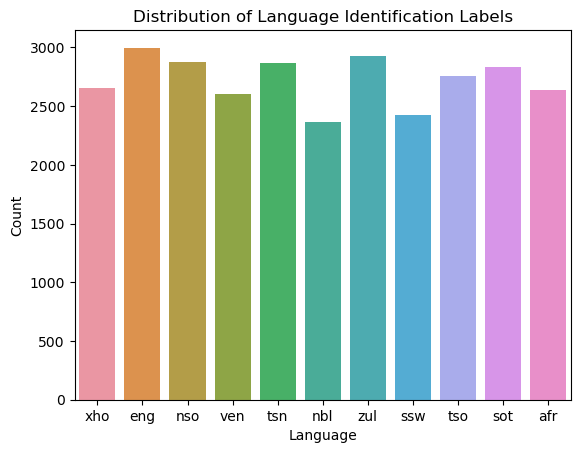

In [83]:
# distribution of language identification labels
sns.countplot(data=df_clean, x='lang_id')
plt.title('Distribution of Language Identification Labels')
plt.xlabel('Language')
plt.ylabel('Count')
plt.show()

The count shows that the distribution of each language identification is evenly distributed.
Character/text length will not be a good distinguishing factor amongst the different languages.


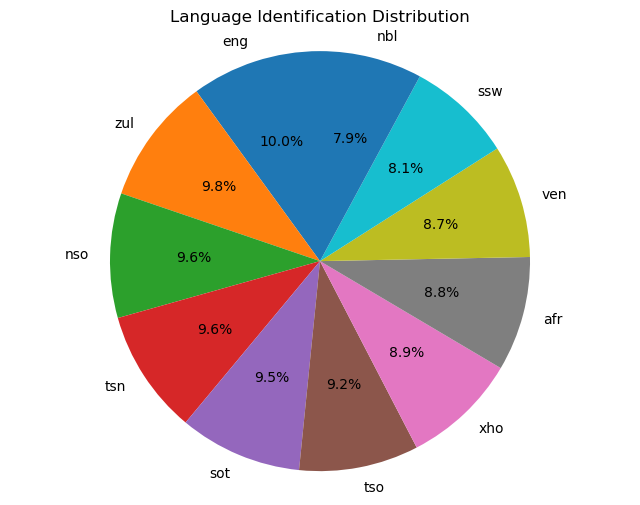

In [84]:
#frequency of each language identification
language_counts = df_clean['lang_id'].value_counts()

#language labels and their counts
languages = language_counts.index.tolist()
counts = language_counts.values.tolist()

plt.figure(figsize=(8, 6))
plt.pie(counts, labels=languages, autopct='%1.1f%%', startangle=90)
plt.title('Language Identification Distribution')
plt.axis('equal')
plt.show()

The language identification distribution shows that the dataset is evenly distributed across the different South African languages. this implies that there is no imbalances on the dataset and the model will be trained more or less equally across the 11 languages.

C:\Users\makhs9\AppData\Local\Temp\ipykernel_20456\1957810322.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Text Length'] = df_clean['text_lower'].apply(lambda x: len(x.split()))


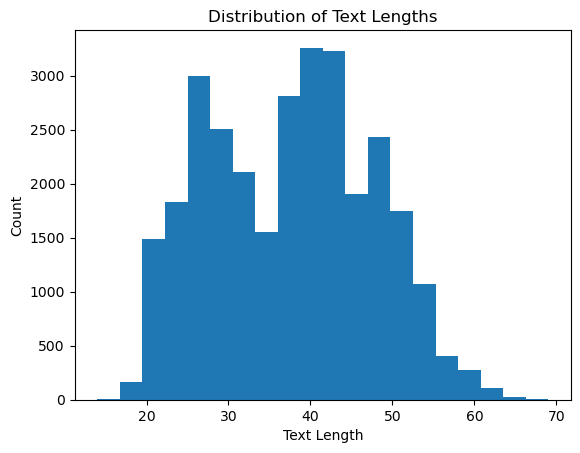

In [85]:
# distribution of text lengths
df_clean['Text Length'] = df_clean['text_lower'].apply(lambda x: len(x.split()))
plt.hist(df_clean['Text Length'], bins=20)
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Count')
plt.show()

In [86]:
df_clean.sample(7)

,lang_id,text,text_lower,Text Length
11041,tso,ku lavisisa swivilelo leswi swi humaka swi ta ...,ku lavisisa swivilelo leswi swi humaka swi ta ...,47
7873,ssw,uma ngabe kukhushulwa imiholo loku kufanele ku...,uma ngabe kukhushulwa imiholo loku kufanele ku...,25
29331,ven,zwihavhane na zwihali wa mulayo wa vhu wa kana...,zwihavhane na zwihali wa mulayo wa vhu wa kana...,39
20275,xho,i-bt sisishunqulelo sentsholongwane eyibhaktir...,i-bt sisishunqulelo sentsholongwane eyibhaktir...,19
6619,eng,everyone in south africa is encouraged from in...,everyone in south africa is encouraged from in...,43
16332,sot,maikutlo a tshebetso ya basebetsi le moya o mo...,maikutlo a tshebetso ya basebetsi le moya o mo...,52
20252,afr,agb minister in regsterme sê ons dis contradic...,agb minister in regsterme sê ons dis contradic...,49


The distribution is skewing to the right, meaning there are ouliers in that direction. this implies that there are texts which have more than usual (average) texts length

There is no normality(non-symmetrical) in the distribution which is to be expected since this are different random texts in different South African languages.

The mode and median of the length of the text is between 35-45 characters in length. a second mode (bi-modal) almost appears at around 25 text length.  

In [87]:
from sklearn.preprocessing import LabelEncoder

# Assuming you have a DataFrame called 'df' with a column named 'lang_id'
# Access the 'lang_id' column and convert it into a list
lang_id_list = df_clean['lang_id'].tolist()

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit the label encoder on the lang_id labels and transform them into numbers
encoded_labels = label_encoder.fit_transform(lang_id_list)

# Add the encoded labels as a new column in the DataFrame
df_clean['lang_id_encoded'] = encoded_labels


C:\Users\makhs9\AppData\Local\Temp\ipykernel_20456\2015193072.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['lang_id_encoded'] = encoded_labels


In [88]:
df_clean.sample(2)

,lang_id,text,text_lower,Text Length,lang_id_encoded
2545,nso,i pukwana ya bosepedi ya batho ba bagolo ii pu...,i pukwana ya bosepedi ya batho ba bagolo ii pu...,39,3
233,nso,dinyakišišo di bontšha gore kago ya dintlo le ...,dinyakišišo di bontšha gore kago ya dintlo le ...,46,3


# Modelling

In [89]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(max_features=3000)
from sklearn.svm import SVC
from sklearn.metrics import f1_score

In [90]:
X = tf.fit_transform(df_clean['text_lower']).toarray()

X         

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [91]:
y = np.array(df_clean['lang_id_encoded'])

y

array([9, 9, 1, ..., 1, 9, 4], dtype=int64)

In [92]:
# Splitting the data into train and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.20)

In [93]:
#models to evaluate and defining them
nb= MultinomialNB()
svm = SVC()
lr = LogisticRegression()

In [94]:
# the Naive Bayes model
nb = MultinomialNB()
nb.fit(X, y)

# Make predictions
y_pred = nb.predict(X)

# Naive Bayes perfomance
accuracy = accuracy_score(y, y_pred)
print("Naive Bayes Accuracy:", accuracy)
print(classification_report(y, y_pred))

Naive Bayes Accuracy: 0.9901495926272205
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2641
           1       0.99      1.00      1.00      2998
           2       0.99      0.96      0.97      2362
           3       1.00      1.00      1.00      2873
           4       1.00      1.00      1.00      2833
           5       0.99      0.97      0.98      2426
           6       1.00      1.00      1.00      2869
           7       1.00      1.00      1.00      2758
           8       1.00      1.00      1.00      2605
           9       0.98      0.98      0.98      2659
          10       0.95      0.98      0.96      2924

    accuracy                           0.99     29948
   macro avg       0.99      0.99      0.99     29948
weighted avg       0.99      0.99      0.99     29948



In [95]:
import joblib

# Save the model weights to a file
nb_weight = 'model_weights.pkl'
joblib.dump(nb, nb_weight)


['model_weights.pkl']

In [96]:
loaded_model = joblib.load(nb_weight)

 THE SVM MODEL

In [97]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#SVM model
svm = SVC()
svm.fit(X, y)

# predictions
y_pred = svm.predict(X)

# model perfomance
accuracy = accuracy_score(y, y_pred)
print("SVM_Accuracy:", accuracy)
print(classification_report(y, y_pred))

In [ ]:
print(y_pred)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Logistic regression model
lr = LogisticRegression()
lr.fit(X, y)

#make predictions
y_pred = lr.predict(X)

# model perfomance
accuracy = accuracy_score(y, y_pred)
print("lr_Accuracy:", accuracy)
print(classification_report(y, y_pred))

# Model validation

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score, KFold

# Assuming you have your features stored in X_test and labels in y_test

# number of folds
k = 5

# Create a KFold object
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Cross-validation for Naive Bayes
nb_scores = cross_val_score(nb, X, y, cv=kf, scoring='accuracy')
nb_precision_scores = cross_val_score(nb, X, y, cv=kf, scoring='precision')
naive_bayes_recall_scores = cross_val_score(nb, X, y, cv=kf, scoring='recall')
naive_bayes_f1_scores = cross_val_score(naive_bayes, X, y, cv=kf, scoring='f1')

# Print the mean accuracy score
print("naive bayes Mean Precision:", nb_precision_scores.mean())
print("naive bayes Mean Recall:", nb_recall_scores.mean())
print("naive bayes Mean F1 Score:", nb_f1_scores.mean())
print("Naive Bayes Mean Accuracy:", nb_scores.mean())

# Model Perfomance

In [ ]:
#load testing data
test = pd.read_csv('test_set.csv')

In [ ]:
test.head()

In [ ]:
test.shape

In [ ]:
test.sample(10)

# Data cleaning

In [ ]:
#checking for Null
test.isnull().sum()

In [ ]:
 # Check for Duplicated Values

test.duplicated().sum()

# EDA

In [ ]:
# transform all the text to lowercase
test['text_lower'] = test['text'].str.lower()


In [ ]:
# distribution of text lengths
test['Text Length'] = test['text_lower'].apply(lambda x: len(x.split()))
plt.hist(test['Text Length'], bins=20)
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Count')
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(max_features=3000)
from sklearn.svm import SVC
from sklearn.metrics import f1_score

In [ ]:
Xt = tf.fit_transform(test['text_lower']).toarray()

Xt         

In [ ]:
from sklearn.preprocessing import LabelEncoder
y = np.array(df_clean['lang_id_encoded'])

y

# model explanation

the naive bayes classifier is chosen as the best model because it is very good with identification and it has a very accuracy. accuracy for identification purposes is very important
Furthermore, the naive bayes model is simple and efficient